### S12 T01: Aprenentatge Supervisat - Regressions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset
df=pd.read_csv('delayedflights.csv', index_col=False, warn_bad_lines=True, error_bad_lines=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [3]:
#delete unnecesary attributes to predict late arrivals
df=df.drop(['Unnamed: 0','Year','FlightNum','TailNum','CancellationCode','DayofMonth','CRSDepTime','CRSArrTime','CRSElapsedTime'], axis=1)

In [4]:
#df.to_csv('delayedflights1.csv')

In [5]:
df.head()

,Month,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,4,2003.0,2211.0,WN,128.0,116.0,-14.0,8.0,IAD,...,810,4.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN
1,1,4,754.0,1002.0,WN,128.0,113.0,2.0,19.0,IAD,...,810,5.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN
2,1,4,628.0,804.0,WN,96.0,76.0,14.0,8.0,IND,...,515,3.0,17.0,0,0,NaN,NaN,NaN,NaN,NaN
3,1,4,1829.0,1959.0,WN,90.0,77.0,34.0,34.0,IND,...,515,3.0,10.0,0,0,2.0,0.0,0.0,0.0,32.0
4,1,4,1940.0,2121.0,WN,101.0,87.0,11.0,25.0,IND,...,688,4.0,10.0,0,0,NaN,NaN,NaN,NaN,NaN


##### Gestió de les dades cícliques
amb un altre mètode no es té en consideració que el diumenge és tan proper al dissabte com al dilluns, per exemple

In [6]:
#hores de sortida/arribada
df['DepTime_sin'] = np.sin(df.DepTime*(2.*np.pi/2400))
df['DepTime_cos'] = np.cos(df.DepTime*(2.*np.pi/2400))
df['ArrTime'] = np.sin(df.ArrTime*(2.*np.pi/2400))
df['ArrTime'] = np.cos(df.ArrTime*(2.*np.pi/2400))

In [7]:
# mesos
df['Month_sin'] = np.sin((df.Month-1)*(2.*np.pi/12))
df['Month_cos'] = np.cos((df.Month-1)*(2.*np.pi/12))

In [8]:
# dies setmana
df['DayOfWeek_sin'] = np.sin((df.DayOfWeek-1)*(2.*np.pi/7))
df['DayOfWeek_cos'] = np.cos((df.DayOfWeek-1)*(2.*np.pi/7))

In [9]:
df=df.drop(['Month','DayOfWeek','DepTime','ArrTime'], axis=1)

In [10]:
df.head()

,UniqueCarrier,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,...,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DepTime_sin,DepTime_cos,Month_sin,Month_cos,DayOfWeek_sin,DayOfWeek_cos
0,WN,128.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,...,NaN,NaN,NaN,NaN,-0.862072,0.506786,0.0,1.0,0.433884,-0.900969
1,WN,128.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,...,NaN,NaN,NaN,NaN,0.919821,-0.392337,0.0,1.0,0.433884,-0.900969
2,WN,96.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,...,NaN,NaN,NaN,NaN,0.997314,-0.073238,0.0,1.0,0.433884,-0.900969
3,WN,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,...,0.0,0.0,0.0,32.0,-0.997119,0.075849,0.0,1.0,0.433884,-0.900969
4,WN,101.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,...,NaN,NaN,NaN,NaN,-0.933580,0.358368,0.0,1.0,0.433884,-0.900969


##### Frequency Encoding columnes Origin i Dest

In [11]:
fe=df.groupby('Origin').size()/len(df)
df.loc[:,'origin_freq']=df['Origin'].map(fe)

fe1=df.groupby('Dest').size()/len(df)
df.loc[:,'dest']=df['Dest'].map(fe1)

##### Mean encoding per la columna UniqueCarrier

In [12]:
mean_encode=df.groupby('UniqueCarrier')['ArrDelay'].mean()
df.loc[:,'carrier_me']=df['UniqueCarrier'].map(mean_encode)

In [13]:
df=df.drop(['Origin','Dest','UniqueCarrier'], axis=1)

In [14]:
df.head()

,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,...,LateAircraftDelay,DepTime_sin,DepTime_cos,Month_sin,Month_cos,DayOfWeek_sin,DayOfWeek_cos,origin_freq,dest,carrier_me
0,128.0,116.0,-14.0,8.0,810,4.0,8.0,0,0,NaN,...,NaN,-0.862072,0.506786,0.0,1.0,0.433884,-0.900969,0.011424,0.011703,30.087884
1,128.0,113.0,2.0,19.0,810,5.0,10.0,0,0,NaN,...,NaN,0.919821,-0.392337,0.0,1.0,0.433884,-0.900969,0.011424,0.011703,30.087884
2,96.0,76.0,14.0,8.0,515,3.0,17.0,0,0,NaN,...,NaN,0.997314,-0.073238,0.0,1.0,0.433884,-0.900969,0.005014,0.015288,30.087884
3,90.0,77.0,34.0,34.0,515,3.0,10.0,0,0,2.0,...,32.0,-0.997119,0.075849,0.0,1.0,0.433884,-0.900969,0.005014,0.015288,30.087884
4,101.0,87.0,11.0,25.0,688,4.0,10.0,0,0,NaN,...,NaN,-0.933580,0.358368,0.0,1.0,0.433884,-0.900969,0.005014,0.004950,30.087884


In [15]:
df['CarrierDelay'] = df['CarrierDelay'].fillna(0)
df['WeatherDelay'] = df['WeatherDelay'].fillna(0)
df['NASDelay'] = df['NASDelay'].fillna(0)
df['SecurityDelay'] = df['SecurityDelay'].fillna(0)
df['LateAircraftDelay'] = df['LateAircraftDelay'].fillna(0)

##### Substitució dels valors nuls

In [16]:
df.isnull().sum()

ActualElapsedTime    8387
AirTime              8387
ArrDelay             8387
DepDelay                0
Distance                0
TaxiIn               7110
TaxiOut               455
Cancelled               0
Diverted                0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
DepTime_sin             0
DepTime_cos             0
Month_sin               0
Month_cos               0
DayOfWeek_sin           0
DayOfWeek_cos           0
origin_freq             0
dest                    0
carrier_me              0
dtype: int64

In [17]:
#substituïm els valors nuls de ActualElapsedTime i AirTime per el valor de la distància
#dividida per la mitjana del temps de vol amb la mitjana de les distàncies

df['ActualElapsedTime']=df['ActualElapsedTime'].fillna(df['Distance']*(df['ActualElapsedTime'].mean()
                                                                       /df['Distance'].mean())).astype(int)
df['AirTime']=df['AirTime'].fillna(df['Distance']*(df['AirTime'].mean()
                                                                       /df['Distance'].mean())).astype(int)

In [18]:
#mitjana de la diferència entre els retrassos de la sortida i l'arribada
dif=(df['DepDelay'].sum(axis=0)-df['ArrDelay'].sum(axis=0))/(len(df['ArrDelay'])-df['ArrDelay'].isnull().sum())

#substitïm els valors nuls de ArrDelay amb la suma de DepDelay i de la mitjana anterior
df['ArrDelay']=df['ArrDelay'].fillna(df['DepDelay']+dif).astype(int)

In [19]:
#substuïm la resta de valors nuls amb la mitjana
df=df.fillna(df.mean().astype(int))

In [20]:
df.isnull().sum()

ActualElapsedTime    0
AirTime              0
ArrDelay             0
DepDelay             0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
DepTime_sin          0
DepTime_cos          0
Month_sin            0
Month_cos            0
DayOfWeek_sin        0
DayOfWeek_cos        0
origin_freq          0
dest                 0
carrier_me           0
dtype: int64

##### Heatmap amb correlació de valors per veure si hi ha molta colinearitat

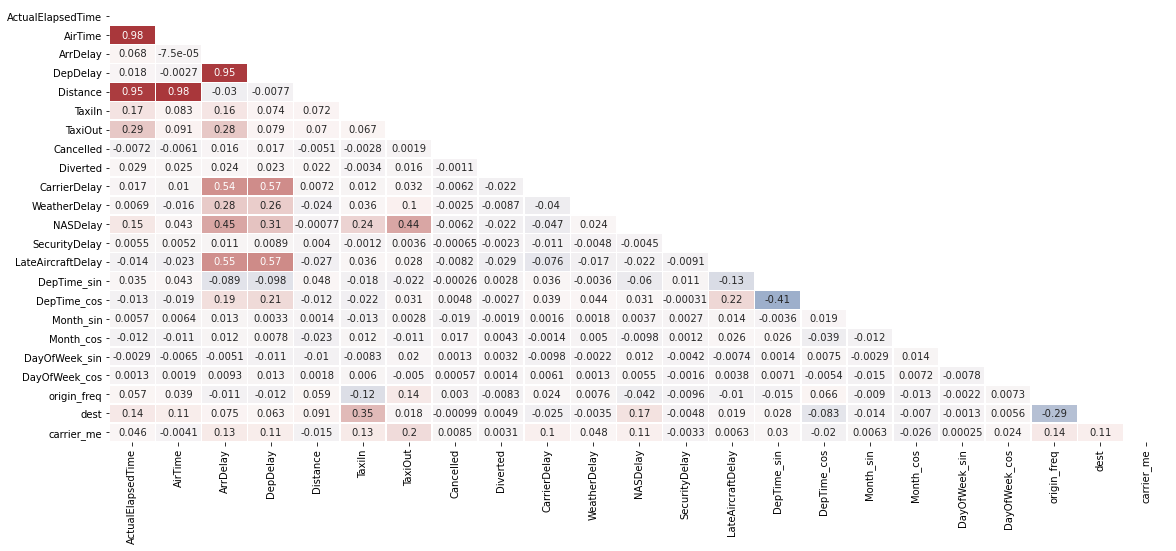

In [21]:
corr = df.corr()
cmap = sns.light_palette("#0c2a70", as_cmap=True)
mask = np.triu(corr)
plt.figure(figsize=(19,8))
sns.heatmap(corr, cmap='vlag', annot=True, linewidths=0.5, center=0.05, cbar=False, xticklabels=True,
           mask=mask)

In [22]:
df.describe()

,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,...,LateAircraftDelay,DepTime_sin,DepTime_cos,Month_sin,Month_cos,DayOfWeek_sin,DayOfWeek_cos,origin_freq,dest,carrier_me
count,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,...,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06
mean,1.334315e+02,1.083788e+02,4.230156e+01,4.318518e+01,7.656862e+02,6.809991e+00,1.823215e+01,3.268348e-04,4.003598e-03,1.235367e+01,...,1.629374e+01,-3.932989e-01,-2.793603e-01,1.013475e-01,2.834784e-02,2.174535e-03,-1.454792e-02,2.322718e-02,1.870087e-02,4.220255e+01
std,7.234577e+01,6.879998e+01,5.690127e+01,5.340250e+01,5.744797e+02,5.264136e+00,1.433685e+01,1.807562e-02,6.314722e-02,3.613493e+01,...,3.585904e+01,6.134638e-01,6.252490e-01,6.602452e-01,7.436410e-01,6.861100e-01,7.273494e-01,2.089243e-02,1.634088e-02,7.658502e+00
min,5.000000e+00,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-9.749279e-01,-9.009689e-01,5.163268e-07,5.163268e-07,2.125538e+01
25%,8.000000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-9.187912e-01,-8.567175e-01,-5.000000e-01,-8.660254e-01,-7.818315e-01,-9.009689e-01,7.120662e-03,6.248070e-03,3.644502e+01
50%,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-6.211478e-01,-4.305111e-01,1.224647e-16,6.123234e-17,0.000000e+00,-2.225209e-01,1.603711e-02,1.452789e-02,4.529506e+01
75%,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,1.000000e+01,...,1.800000e+01,-7.853901e-03,2.764761e-01,8.660254e-01,8.660254e-01,7.818315e-01,6.234898e-01,3.034556e-02,2.522669e-02,4.755426e+01
max,1.114000e+03,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,...,1.316000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.749279e-01,1.000000e+00,6.795532e-02,5.627136e-02,5.528705e+01


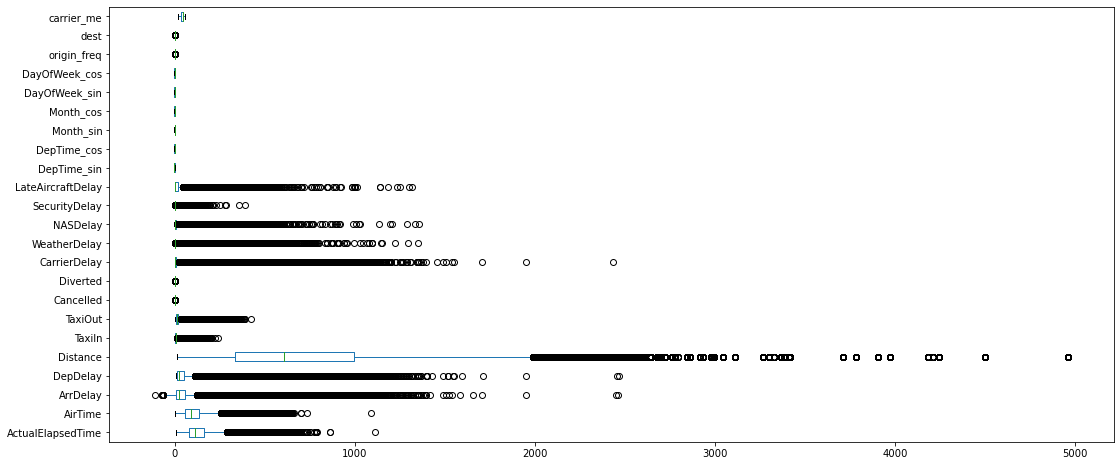

In [23]:
df.plot(kind='box',figsize=(18,8),vert=False)

In [24]:
# RobustScaler i QuantileTransformer per els atributs amb molts outliers
from sklearn.preprocessing import RobustScaler,QuantileTransformer

robust=['DepDelay','Distance','Cancelled','CarrierDelay','WeatherDelay','NASDelay','LateAircraftDelay']
quantile=['SecurityDelay','TaxiIn','TaxiOut','ActualElapsedTime','AirTime']


scaler = QuantileTransformer()
scaler1 = RobustScaler()

df[quantile] = scaler.fit_transform(df[quantile])
df[robust] = scaler1.fit_transform(df[robust])

In [25]:
df.to_csv('delayed.csv')

In [26]:
df25 = df.sample(frac =.25)

In [27]:
# Save the sampled database for later use
df25.to_csv('delayed25.csv')